# Data Skills

## Motivation
Load and Analyze iOS App Store and Google Play Store datasets.


## Architecture
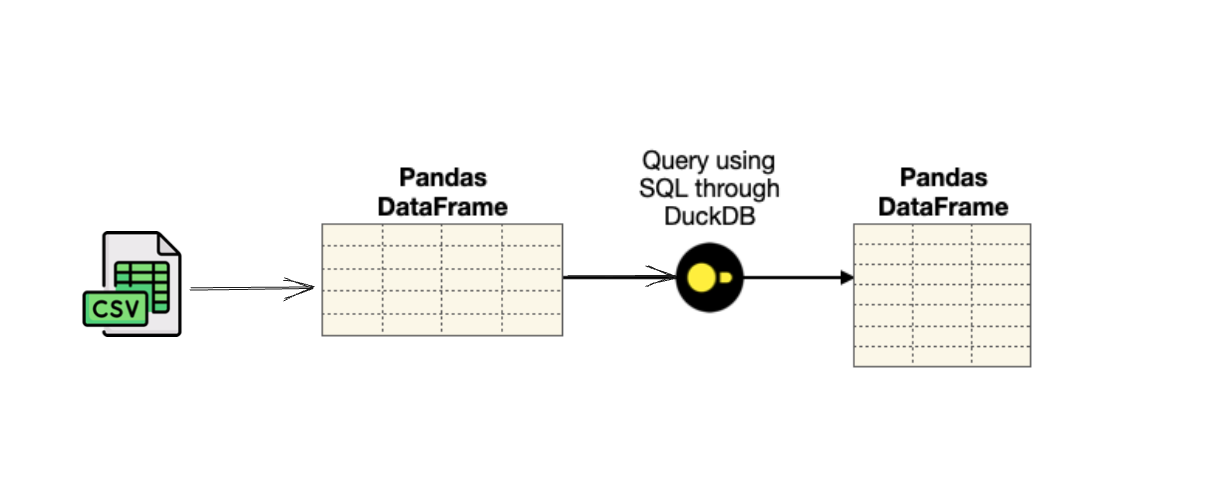
- If you have followed the README, Kaggle datasets are downloaded via [Kaggle CLI](https://github.com/Kaggle/kaggle-api#installation) and placed into `data/` directory.
- Data is be loaded into Pandas via CSV api.
- [DuckDb]https://duckdb.org/) is used to query the in-memory data from Pandas via SQL. As DuckDB uses the same memory allocated to Pandas dataframe, the results are really fast.
- Query result returned by DuckDB is transformed into Pandas DataFrame which is used to plot via [Seaborn](https://seaborn.pydata.org/). 


## Details
We will not use the complete dataset, but only the subset of Apps that are categorized as being a Game, Music, or Health app. Unfortunately, the App Store and Google Play have differing definitions of how these categories are named and organized. On the App Store, the following Primary Genres map to these categories: Games, Music, and Health & Fitness. On Google Play, there isn’t a Games category, but rather a bunch of categories that map to Games: Action, Adventure, Arcade, Board, Card, Casino, Casual, Educational, Music, Puzzle, Racing, Role Playing, Simulation, Sports, Strategy, Trivia, and Word. The other categories to load are Music & Audio and Health & Fitness.

We will do the following tasks:
- Plot the distribution of app sizes across our three categories. This column is called Size_Bytes in the App Store data and Size in the Google Play data.
- Compute the average rating across all ratings for each of the three categories. Note that we’re not looking for an average of the average ratings for each category, but rather the average across all ratings for each category. For example, if we have two apps in the same category and one app has 1 rating with an average of 1.0 and the other app has 2 ratings with an average of 5.0, the value we’re looking for is 3.7 (average of 1, 5, and 5), not 3.0 (average of 1 and 5). The relevant columns here are Average_User_Rating and Reviews for the App Store and Rating and Rating Count for Google Play.
- Plot the number of new releases in each category over time by month, using the Released column.
- List the 10 biggest apps by size in each category by year.

## Install Modules

#### DuckDB
DuckDB is an in-process SQL OLAP database management system

### pandas matplotlib seaborn

In [1]:
! pip install duckdb pandas matplotlib seaborn

# Import modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb

# Load Google PlayStore dataset

In [3]:
google_df = pd.read_csv('../data/Google-Playstore.csv', parse_dates=['Last Updated','Released'])

In [4]:
google_df.shape

(2312944, 24)

In [5]:
google_df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [6]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype         
---  ------             -----         
 0   App Name           object        
 1   App Id             object        
 2   Category           object        
 3   Rating             float64       
 4   Rating Count       float64       
 5   Installs           object        
 6   Minimum Installs   float64       
 7   Maximum Installs   int64         
 8   Free               bool          
 9   Price              float64       
 10  Currency           object        
 11  Size               object        
 12  Minimum Android    object        
 13  Developer Id       object        
 14  Developer Website  object        
 15  Developer Email    object        
 16  Released           datetime64[ns]
 17  Last Updated       datetime64[ns]
 18  Content Rating     object        
 19  Privacy Policy     object        
 20  Ad Supported       bool 

In [7]:
google_df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price,Released,Last Updated
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06,2241891,2312944
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01,2018-08-29 21:30:30.997313024,2019-12-05 18:40:39.280847872
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2010-01-28 00:00:00,2009-02-09 00:00:00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00,2017-07-02 00:00:00,2019-04-18 00:00:00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00,2019-03-21 00:00:00,2020-05-16 00:00:00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00,2020-04-16 00:00:00,2021-02-05 00:00:00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02,2021-06-16 00:00:00,2021-06-16 00:00:00
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00,NaN,NaN


In [8]:
google_df.head(4)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,2020-02-26,2020-02-26,Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,2020-05-21,2021-05-06,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,2019-08-09,2019-08-19,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,2018-09-10,2018-10-13,Everyone,NaN,True,False,False,2021-06-15 20:19:35


#### Drop unused features

In [9]:
google_df.drop(['App Id','Developer Website','Developer Email','Developer Id','Privacy Policy'],axis=1,inplace=True)
google_df.head()

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,2020-02-26,2020-02-26,Everyone,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,2020-05-21,2021-05-06,Everyone,True,False,False,2021-06-15 20:19:35
2,Vibook,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,2019-08-09,2019-08-19,Everyone,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,2018-09-10,2018-10-13,Everyone,True,False,False,2021-06-15 20:19:35
4,GROW.me,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,2020-02-21,2018-11-12,Everyone,False,False,False,2021-06-15 20:19:35


#### Installs of Apps

In [10]:
def string_to_numeric(data):
    data = str(data).replace(',','')
    data = data[:-1]
    return int(data) if data.isdigit() else None

google_df['Installs'] = google_df['Installs'].apply(string_to_numeric)

In [11]:
google_df['Installs'].head(100)

0         10.0
1       5000.0
2         50.0
3         10.0
4        100.0
        ...   
95    100000.0
96       100.0
97       100.0
98      1000.0
99         5.0
Name: Installs, Length: 100, dtype: float64

#### Size of Apps

In [12]:
# Size of App
# convert every size to Bytes and float number
def convert_size_to_bytes(x):
    if isinstance(x, str):
        suffixes = {"K": 1e3, "M": 1e6, "G": 1e9, "T": 1e12}
        size, suffix = x[:-1], x[-1].upper()
        if suffix in suffixes and size.replace('.','').isnumeric():
            return float(float(size) * suffixes[suffix])
    return None

google_df['Size_Bytes'] = google_df['Size'].apply(convert_size_to_bytes)

In [13]:
google_df['Size_Bytes'].head()

0    10000000.0
1     2900000.0
2     3700000.0
3     1800000.0
4     6200000.0
Name: Size_Bytes, dtype: float64

#### Map categories to Games, Music and Health

In [14]:
google_categories = {
    'Game': ['Action', 'Adventure', 'Arcade', 'Board', 'Card', 'Casino',
'Casual', 'Educational', 'Music', 'Puzzle', 'Racing',
'Role Playing', 'Simulation', 'Sports', 'Strategy', 'Trivia', 'Word',],
    'Music': ['Music & Audio'],
    'Health': ['Health & Fitness']
}

def map_to_categories(x):
    category = x
    if isinstance(x, str):
        
        if x in google_categories['Music']:
            category = 'Music'
        elif x in google_categories['Game']:
            category = 'Game'
        elif x in google_categories['Health']:
            category = 'Health'         
    return category


google_df.loc[:,'Category'] = google_df['Category'].apply(map_to_categories)

In [15]:
google_df['Category'].head(4)

0             Game
1            Tools
2     Productivity
3    Communication
Name: Category, dtype: object

# Load Apple AppStore dataset

In [16]:
apple_df = pd.read_csv('../data/appleAppData.csv', parse_dates=['Updated','Released'])

In [17]:
apple_df.shape

(1230376, 21)

In [18]:
apple_df.columns

Index(['App_Id', 'App_Name', 'AppStore_Url', 'Primary_Genre', 'Content_Rating',
       'Size_Bytes', 'Required_IOS_Version', 'Released', 'Updated', 'Version',
       'Price', 'Currency', 'Free', 'DeveloperId', 'Developer',
       'Developer_Url', 'Developer_Website', 'Average_User_Rating', 'Reviews',
       'Current_Version_Score', 'Current_Version_Reviews'],
      dtype='object')

In [19]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230376 entries, 0 to 1230375
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype              
---  ------                   --------------    -----              
 0   App_Id                   1230376 non-null  object             
 1   App_Name                 1230375 non-null  object             
 2   AppStore_Url             1230376 non-null  object             
 3   Primary_Genre            1230376 non-null  object             
 4   Content_Rating           1230376 non-null  object             
 5   Size_Bytes               1230152 non-null  float64            
 6   Required_IOS_Version     1230376 non-null  object             
 7   Released                 1230373 non-null  datetime64[ns, UTC]
 8   Updated                  1230376 non-null  datetime64[ns, UTC]
 9   Version                  1230376 non-null  object             
 10  Price                    1229886 non-null  float64            
 11

In [20]:
apple_df.describe()

,Size_Bytes,Price,DeveloperId,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
count,1.230152e+06,1.229886e+06,1.230376e+06,1.230376e+06,1.230376e+06,1.230376e+06,1.230376e+06
mean,7.510857e+07,5.041264e-01,1.092869e+09,1.788387e+00,8.259478e+02,1.788387e+00,8.259478e+02
std,2.318726e+08,6.869674e+00,4.090897e+08,2.154105e+00,5.016051e+04,2.154105e+00,5.016051e+04
min,2.762800e+04,0.000000e+00,2.816565e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.041344e+07,0.000000e+00,7.381109e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.333158e+07,0.000000e+00,1.179711e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.365466e+07,0.000000e+00,1.471960e+09,4.333330e+00,3.000000e+00,4.333330e+00,3.000000e+00
max,7.677945e+10,9.999900e+02,1.590233e+09,5.000000e+00,2.268533e+07,5.000000e+00,2.268533e+07


In [21]:
apple_df.head(4)

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,...,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28 03:02:41+00:00,2018-12-21 21:30:36+00:00,1.1.2,...,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,NaN,0.0,0,0.0,0
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31 19:31:32+00:00,2019-07-23 20:31:09+00:00,1.3,...,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,NaN,5.0,1,5.0,1
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296.0,9.0,2021-04-14 07:00:00+00:00,2021-05-30 21:08:54+00:00,1.3.1,...,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,NaN,0.0,0,0.0,0
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392.0,8.0,2012-02-10 03:40:07+00:00,2019-10-29 12:40:37+00:00,1.2,...,USD,False,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,NaN,0.0,0,0.0,0


In [22]:
apple_df.head(2)

,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,...,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28 03:02:41+00:00,2018-12-21 21:30:36+00:00,1.1.2,...,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,NaN,0.0,0,0.0,0
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31 19:31:32+00:00,2019-07-23 20:31:09+00:00,1.3,...,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,NaN,5.0,1,5.0,1


#### Drop unused features

In [23]:
apple_df.drop(['App_Id', 'Developer', 'Developer_Website','Developer_Url','DeveloperId'],axis=1,inplace=True)
apple_df.head()

,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,Price,Currency,Free,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28 03:02:41+00:00,2018-12-21 21:30:36+00:00,1.1.2,0.00,USD,True,0.0,0,0.0,0
1,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31 19:31:32+00:00,2019-07-23 20:31:09+00:00,1.3,0.00,USD,True,5.0,1,5.0,1
2,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296.0,9.0,2021-04-14 07:00:00+00:00,2021-05-30 21:08:54+00:00,1.3.1,0.00,USD,True,0.0,0,0.0,0
3,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392.0,8.0,2012-02-10 03:40:07+00:00,2019-10-29 12:40:37+00:00,1.2,2.99,USD,False,0.0,0,0.0,0
4,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224.0,9.0,2020-12-16 08:00:00+00:00,2020-12-18 21:36:11+00:00,1.0.1,0.00,USD,True,0.0,0,0.0,0


#### Map Game, Music & Health categories and align the Category Column

In [24]:
apple_categories = {
    'Game': ['Games',],
    'Health': ['Health & Fitness']
}

def map_to_categories(x):
    category = x
    if isinstance(x, str):
        if x in apple_categories['Game']:
            category = 'Game'
        elif x in apple_categories['Health']:
            category = 'Health'         
    return category


apple_df.loc[:,'Category'] = apple_df['Primary_Genre'].apply(map_to_categories)

In [25]:
apple_df['Category'].head(4)

0    Education
1         Book
2         Book
3         Book
Name: Category, dtype: object

# Subset dataframe to only include Games, Music, and Health apps

In [26]:
interested_categories = ['Game', 'Music', 'Health']

google_df = google_df[google_df['Category'].isin(interested_categories)]
apple_df = apple_df[apple_df['Category'].isin(interested_categories)]

# Task 1: Plot distribution of app sizes across categories

In [27]:
# General purpose function
def plot_distribution_of_app_size_per_category(df, categeory_column, title = "Distribution"):
    """Plot the distribution of App Sizes per Category from the given dataframe (df) and category column
    
    It also do certain cleaning/transformation of the data provided which includes:
    - fill NA sizes wtih average size in Bytes
    - convert sizes to MBs and then plot
    - plot boxplot bacause we are interested in the distribution of each app per category
    """

    df.loc[:,'Size_Bytes'].fillna(value=df['Size_Bytes'].mean(), inplace=True)
    df.loc[:,'Size_MB'] = df['Size_Bytes'] / (1024*1024)

    fig, ax = plt.subplots(figsize=(20,16))
    sns.boxenplot(x=categeory_column, y='Size_MB', data=df, palette="Set2")
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    plt.title(title, size=20)

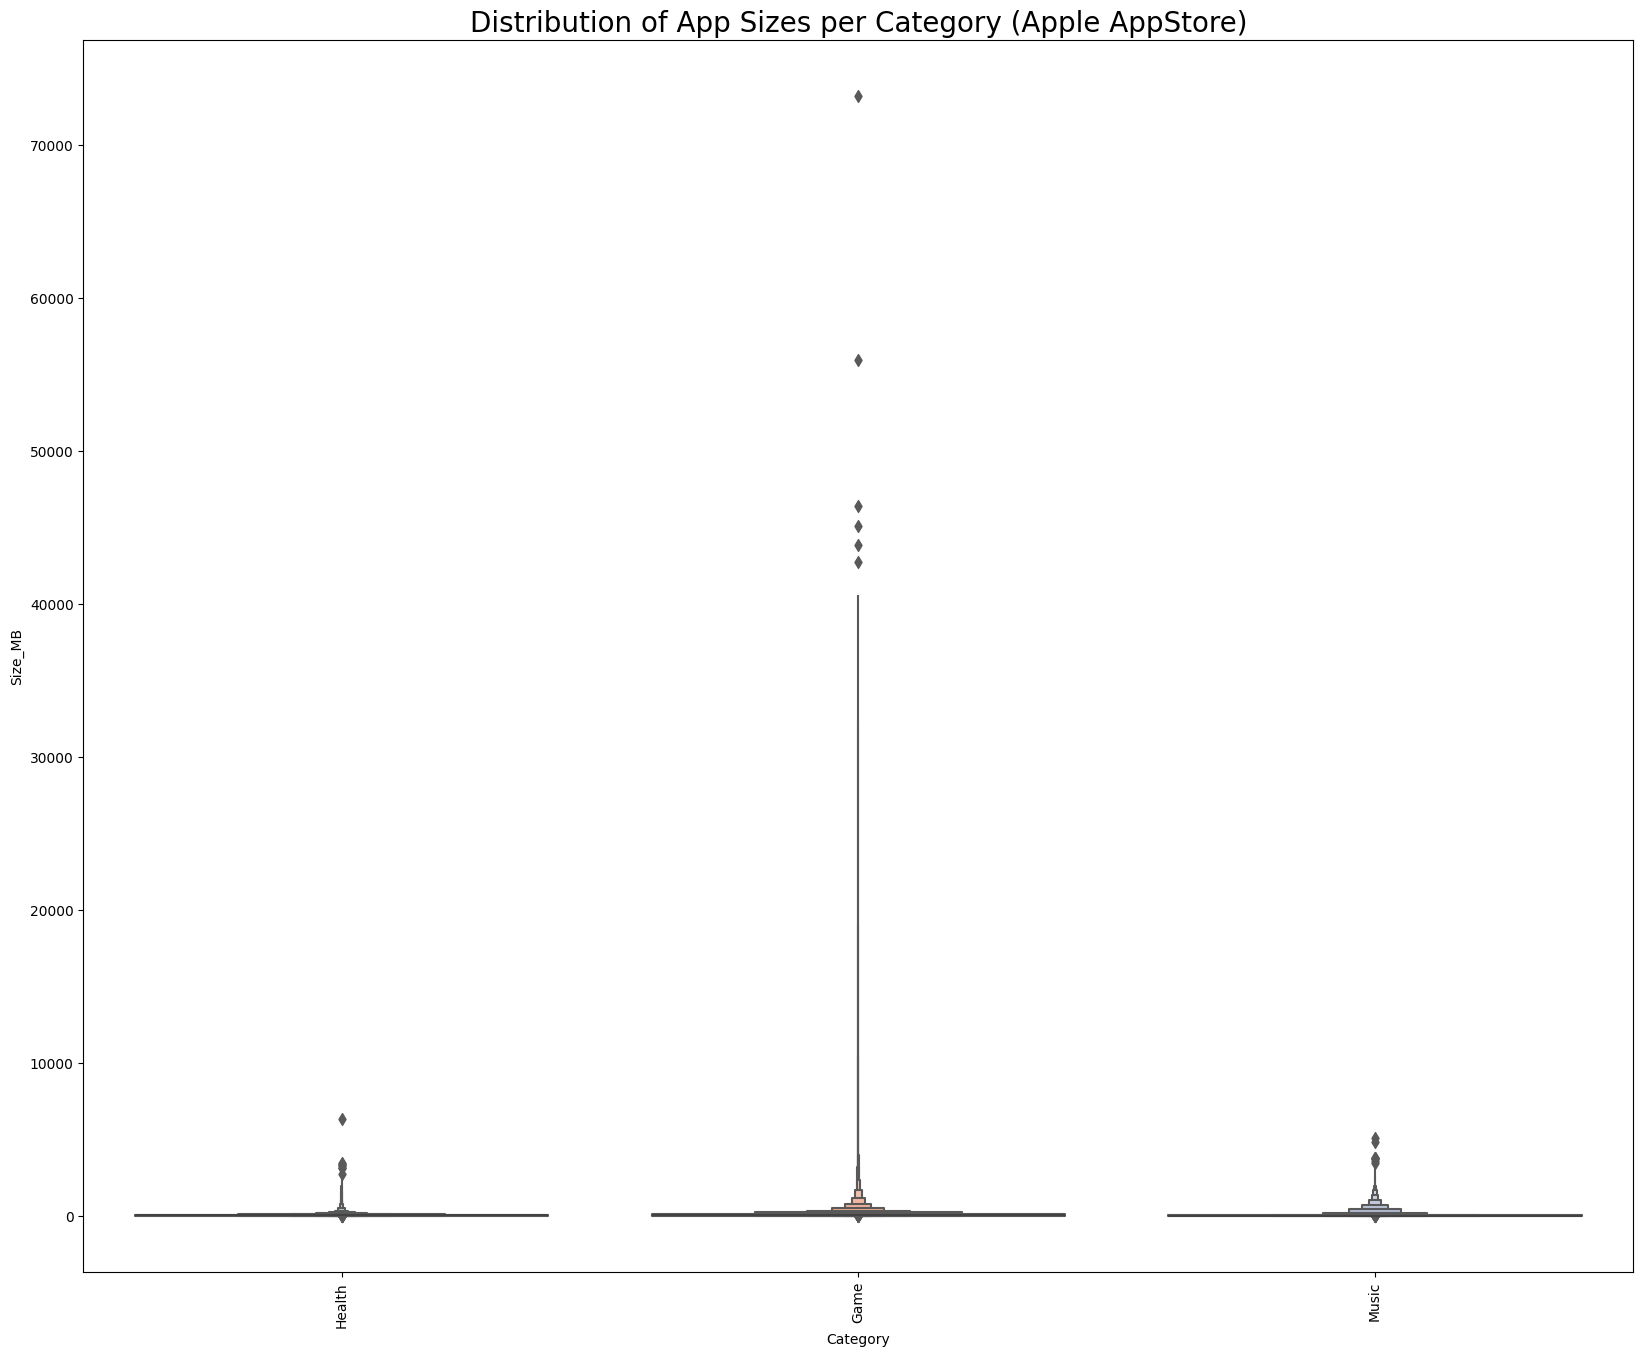

In [28]:
fig_title = 'Distribution of App Sizes per Category (Apple AppStore)'
category_column = 'Category'
plot_distribution_of_app_size_per_category(apple_df, categeory_column=category_column, title=fig_title)

### Distribution of App Sizes per Category (Apple AppStore)

Looks like following there are some outliers in Apple AppStore data. 

- Over 99% of the apps are around 100 MBs
- Outliers exists from 1GB untill 70GB


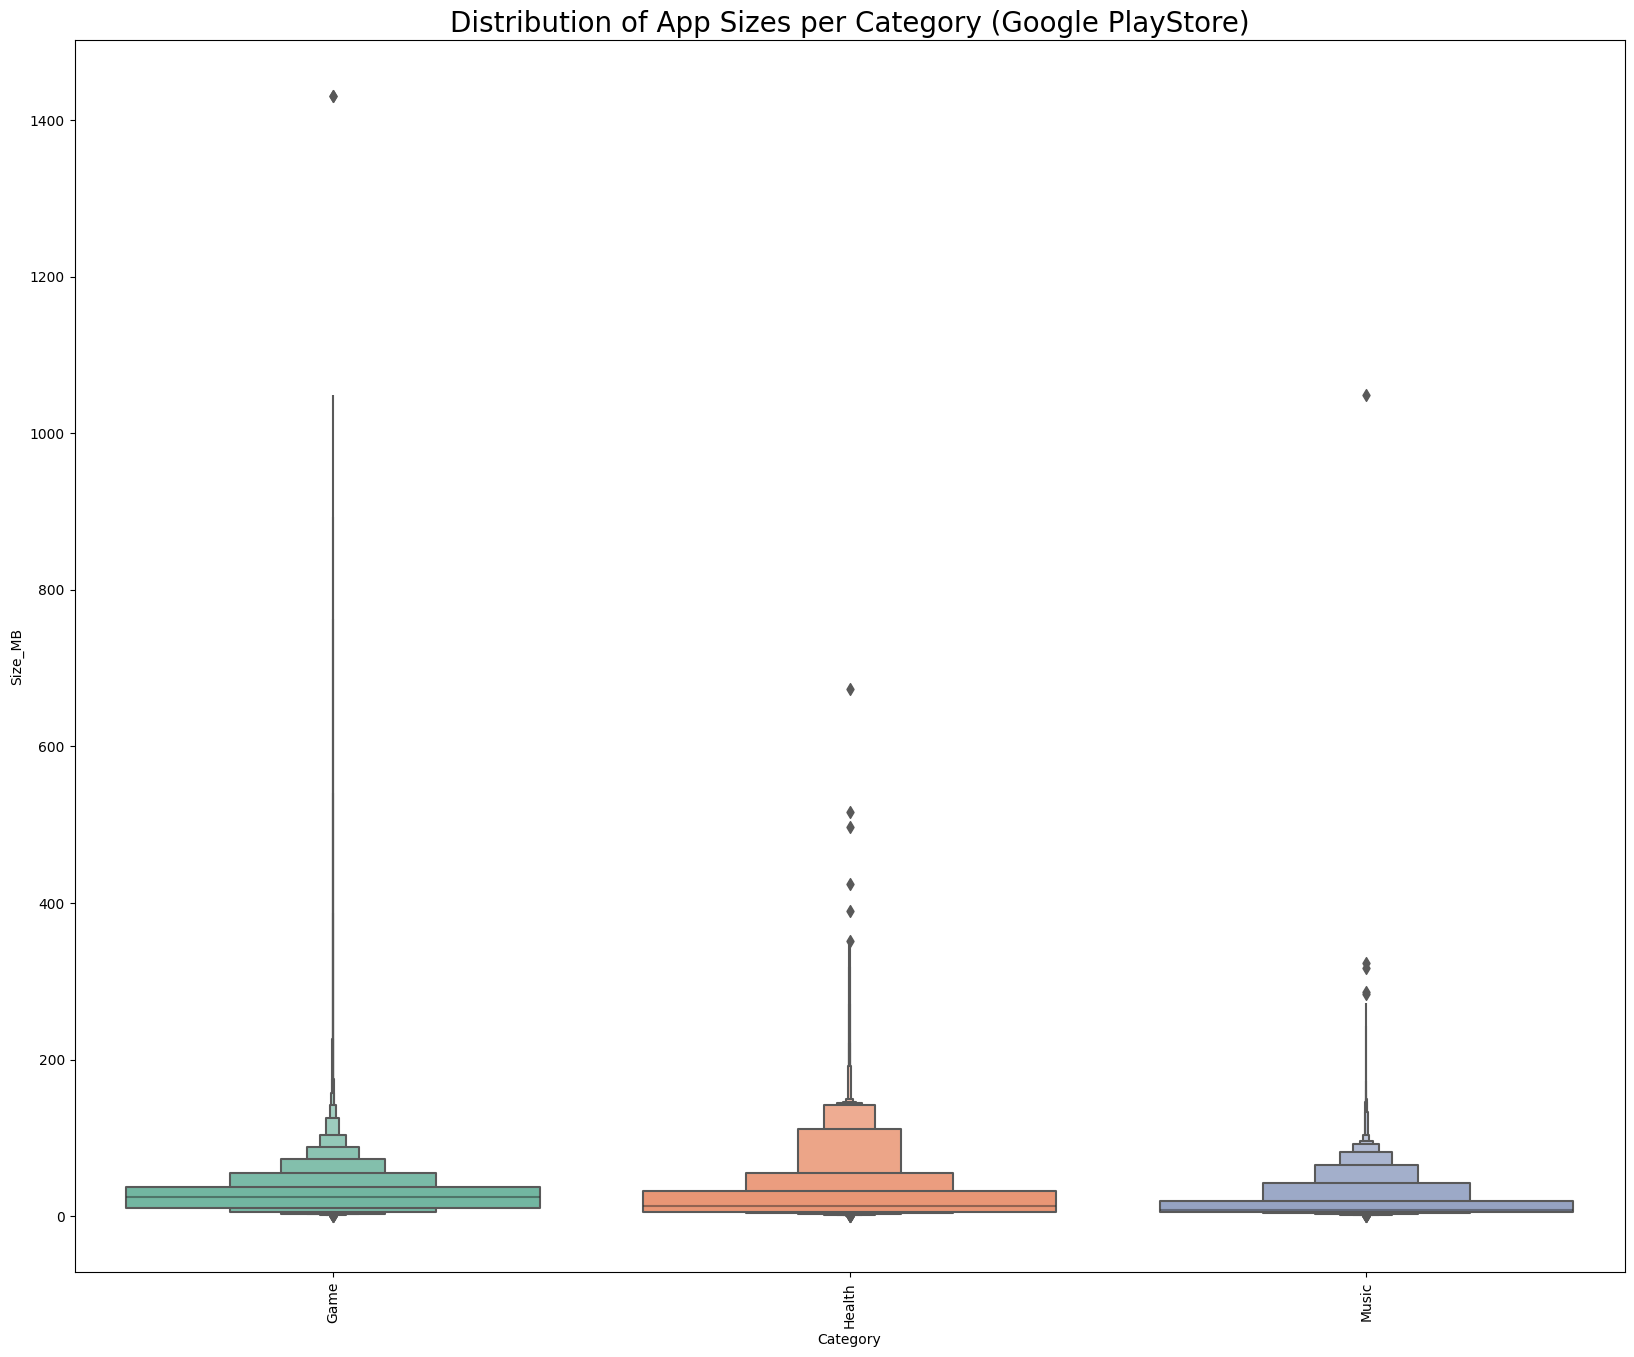

In [29]:
fig_title = 'Distribution of App Sizes per Category (Google PlayStore)'
plot_distribution_of_app_size_per_category(google_df, 'Category', fig_title)

### Distribution of App Sizes per Category (Google PlayStore)

Looks like following there are some outliers in Apple AppStore data. 

- Over 99.99% of the apps are around 100MB
- Outliers exists from 200MB untill 1400MB


# Task 2: Compute the average rating for each category


Text(0.5, 1.0, 'Rating distributions')

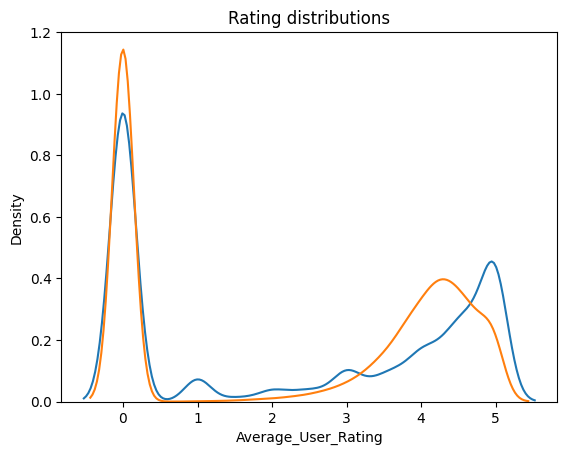

In [30]:
# Rating distribution
sns.kdeplot(x=apple_df.Average_User_Rating,)
sns.kdeplot(x=google_df.Rating)
plt.title("Rating distributions")

### Rating Distribution
- There are more apps with ratings from 0-1 and less apps with ratings from 4-5
- There might be the case that we have more rating counts of apps with rating from 4-5 than 0-1

In [31]:
query = """
    select 
        Category,
        sum(Rating * "Rating Count") / sum("Rating Count") as Avg_Rating
    from google_df
    group by 1
    order by 2
"""

avg_rating_google = duckdb.query(query).to_df()
avg_rating_google

,Category,Avg_Rating
0,Game,4.279628
1,Music,4.387132
2,Health,4.474643


In [32]:
query = """
    select 
        Category,
        sum(Average_User_Rating * Reviews) / sum(Reviews) as Avg_Rating
    from apple_df
    group by 1
    order by 2
"""

avg_rating_apple = duckdb.query(query).to_df()
avg_rating_apple

,Category,Avg_Rating
0,Game,4.620479
1,Health,4.754431
2,Music,4.767138


Text(0.5, 1.0, 'Avgerage Rating for each category (Google PlayStore vs Apple AppStore)')

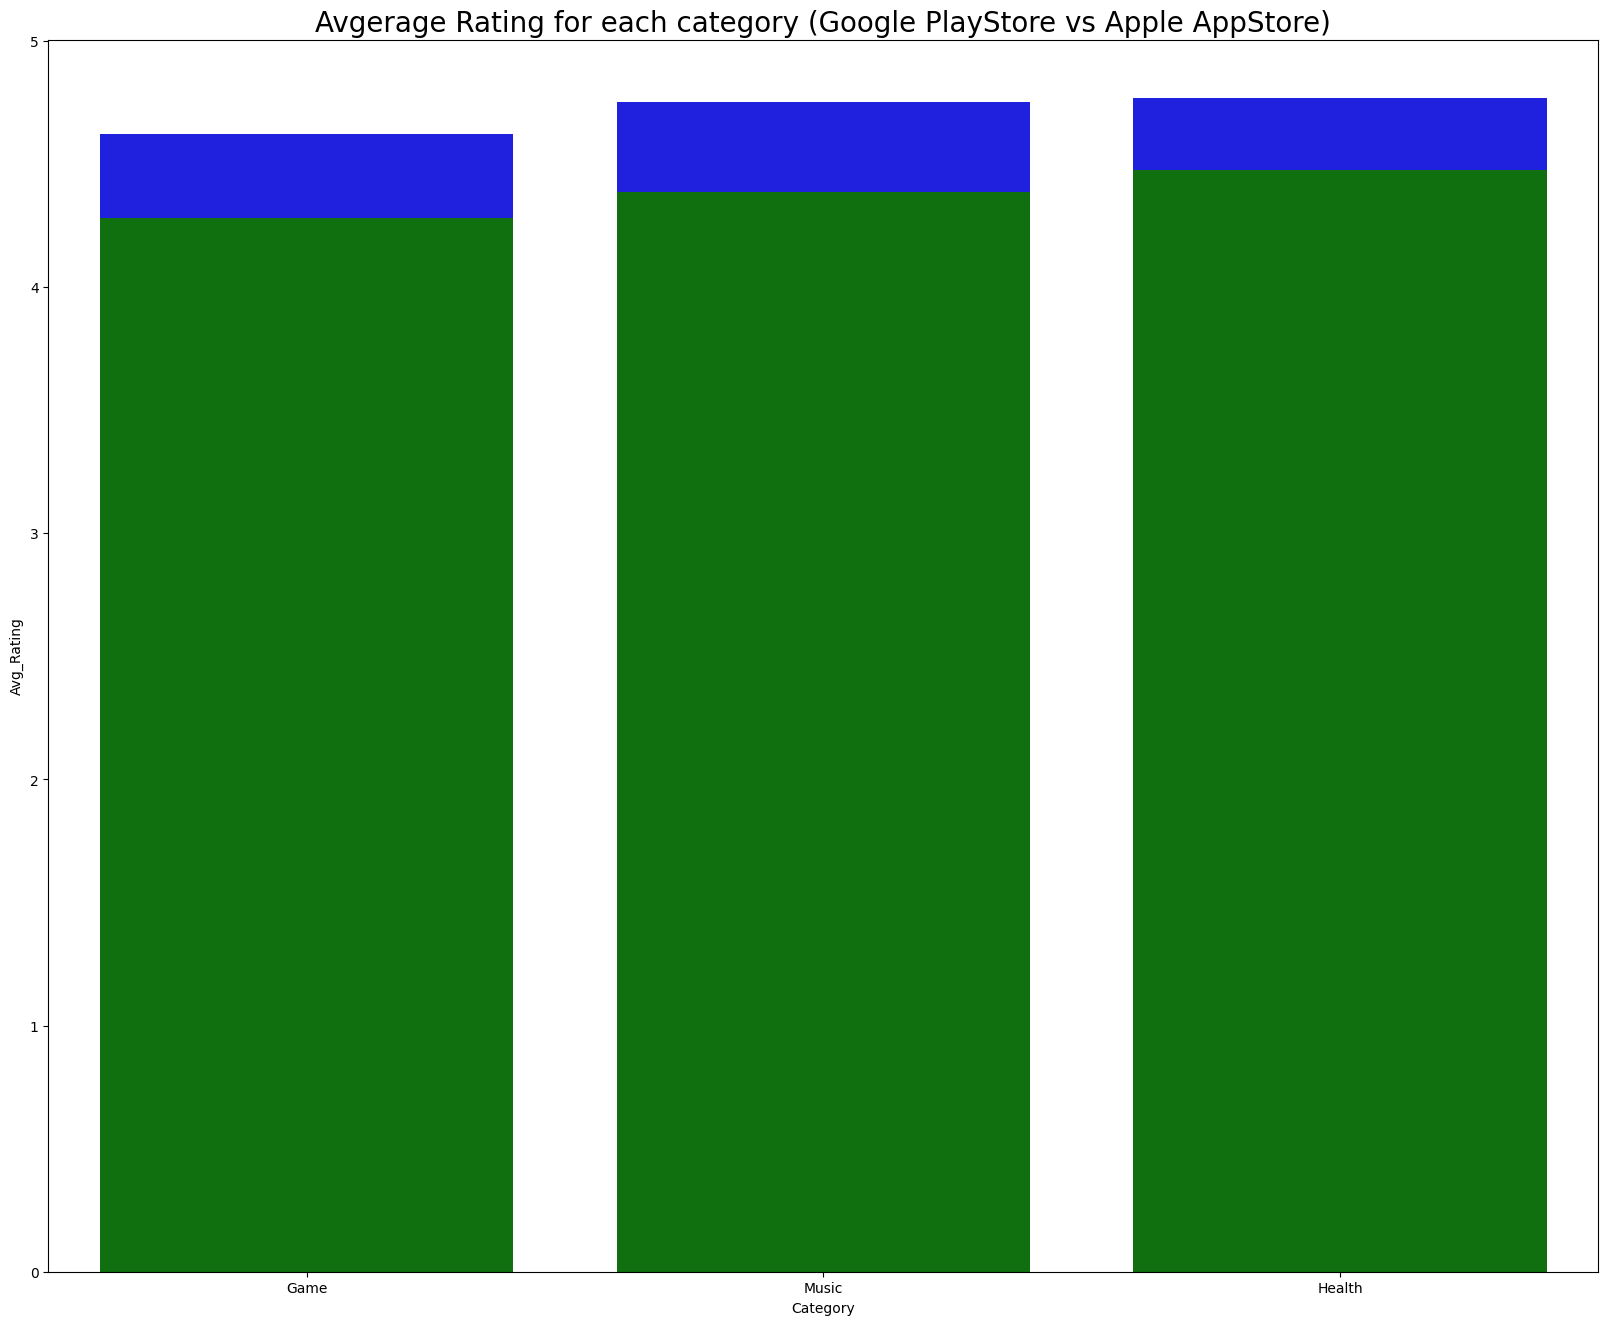

In [33]:
fig, ax = plt.subplots(figsize=(20,16))
sns.barplot(x='Category', y=avg_rating_apple['Avg_Rating'], data=avg_rating_apple, color='Blue')
sns.barplot(x='Category', y=avg_rating_google['Avg_Rating'], data=avg_rating_google, color='Green')
plt.title("Avgerage Rating for each category (Google PlayStore vs Apple AppStore)", size=20)

### Ratings - App Counts
- Avg. Ratings in Apple AppStore are higher than in Google PlayStore
- App ratings per categpory are distributed between 4.0-4.5 in PlayStore and 4.5-4.7 in AppStore
- Music category apps in AppStore outnumbered the other apps other categories in PlayStore as well as in AppStore
- Health category apps have outnumbered other categories in PlayStore

# Task 3: Plot number of new releases by month

In [34]:
query = """
    select
        date_trunc('month', Released) as Released_Month,
        Category || '_PlayStore' as Category,
        Count(1) as New_Releases
    from google_df
    group by 1, 2
"""


google_new_releases_MoM = duckdb.query(query).to_df()
google_new_releases_MoM.head()

,Released_Month,Category,New_Releases
0,2019-06-01,Music_PlayStore,3594
1,2020-03-01,Music_PlayStore,3917
2,2020-04-01,Game_PlayStore,8303
3,2018-03-01,Game_PlayStore,3890
4,2014-12-01,Health_PlayStore,253


In [35]:
query = """
    select
        date_trunc('month', Released) as Released_Month,
        Category || '_AppStore' as Category,
        Count(1) as New_Releases
    from apple_df
    group by 1, 2
"""


apple_new_releases_MoM = duckdb.query(query).to_df()
apple_new_releases_MoM.head()

,Released_Month,Category,New_Releases
0,2017-04-30 22:00:00+00:00,Health_AppStore,497
1,2021-07-31 22:00:00+00:00,Health_AppStore,1437
2,2015-09-30 22:00:00+00:00,Health_AppStore,321
3,2019-08-31 22:00:00+00:00,Health_AppStore,808
4,2021-09-30 22:00:00+00:00,Health_AppStore,487


<Axes: xlabel='Released_Month', ylabel='New_Releases'>

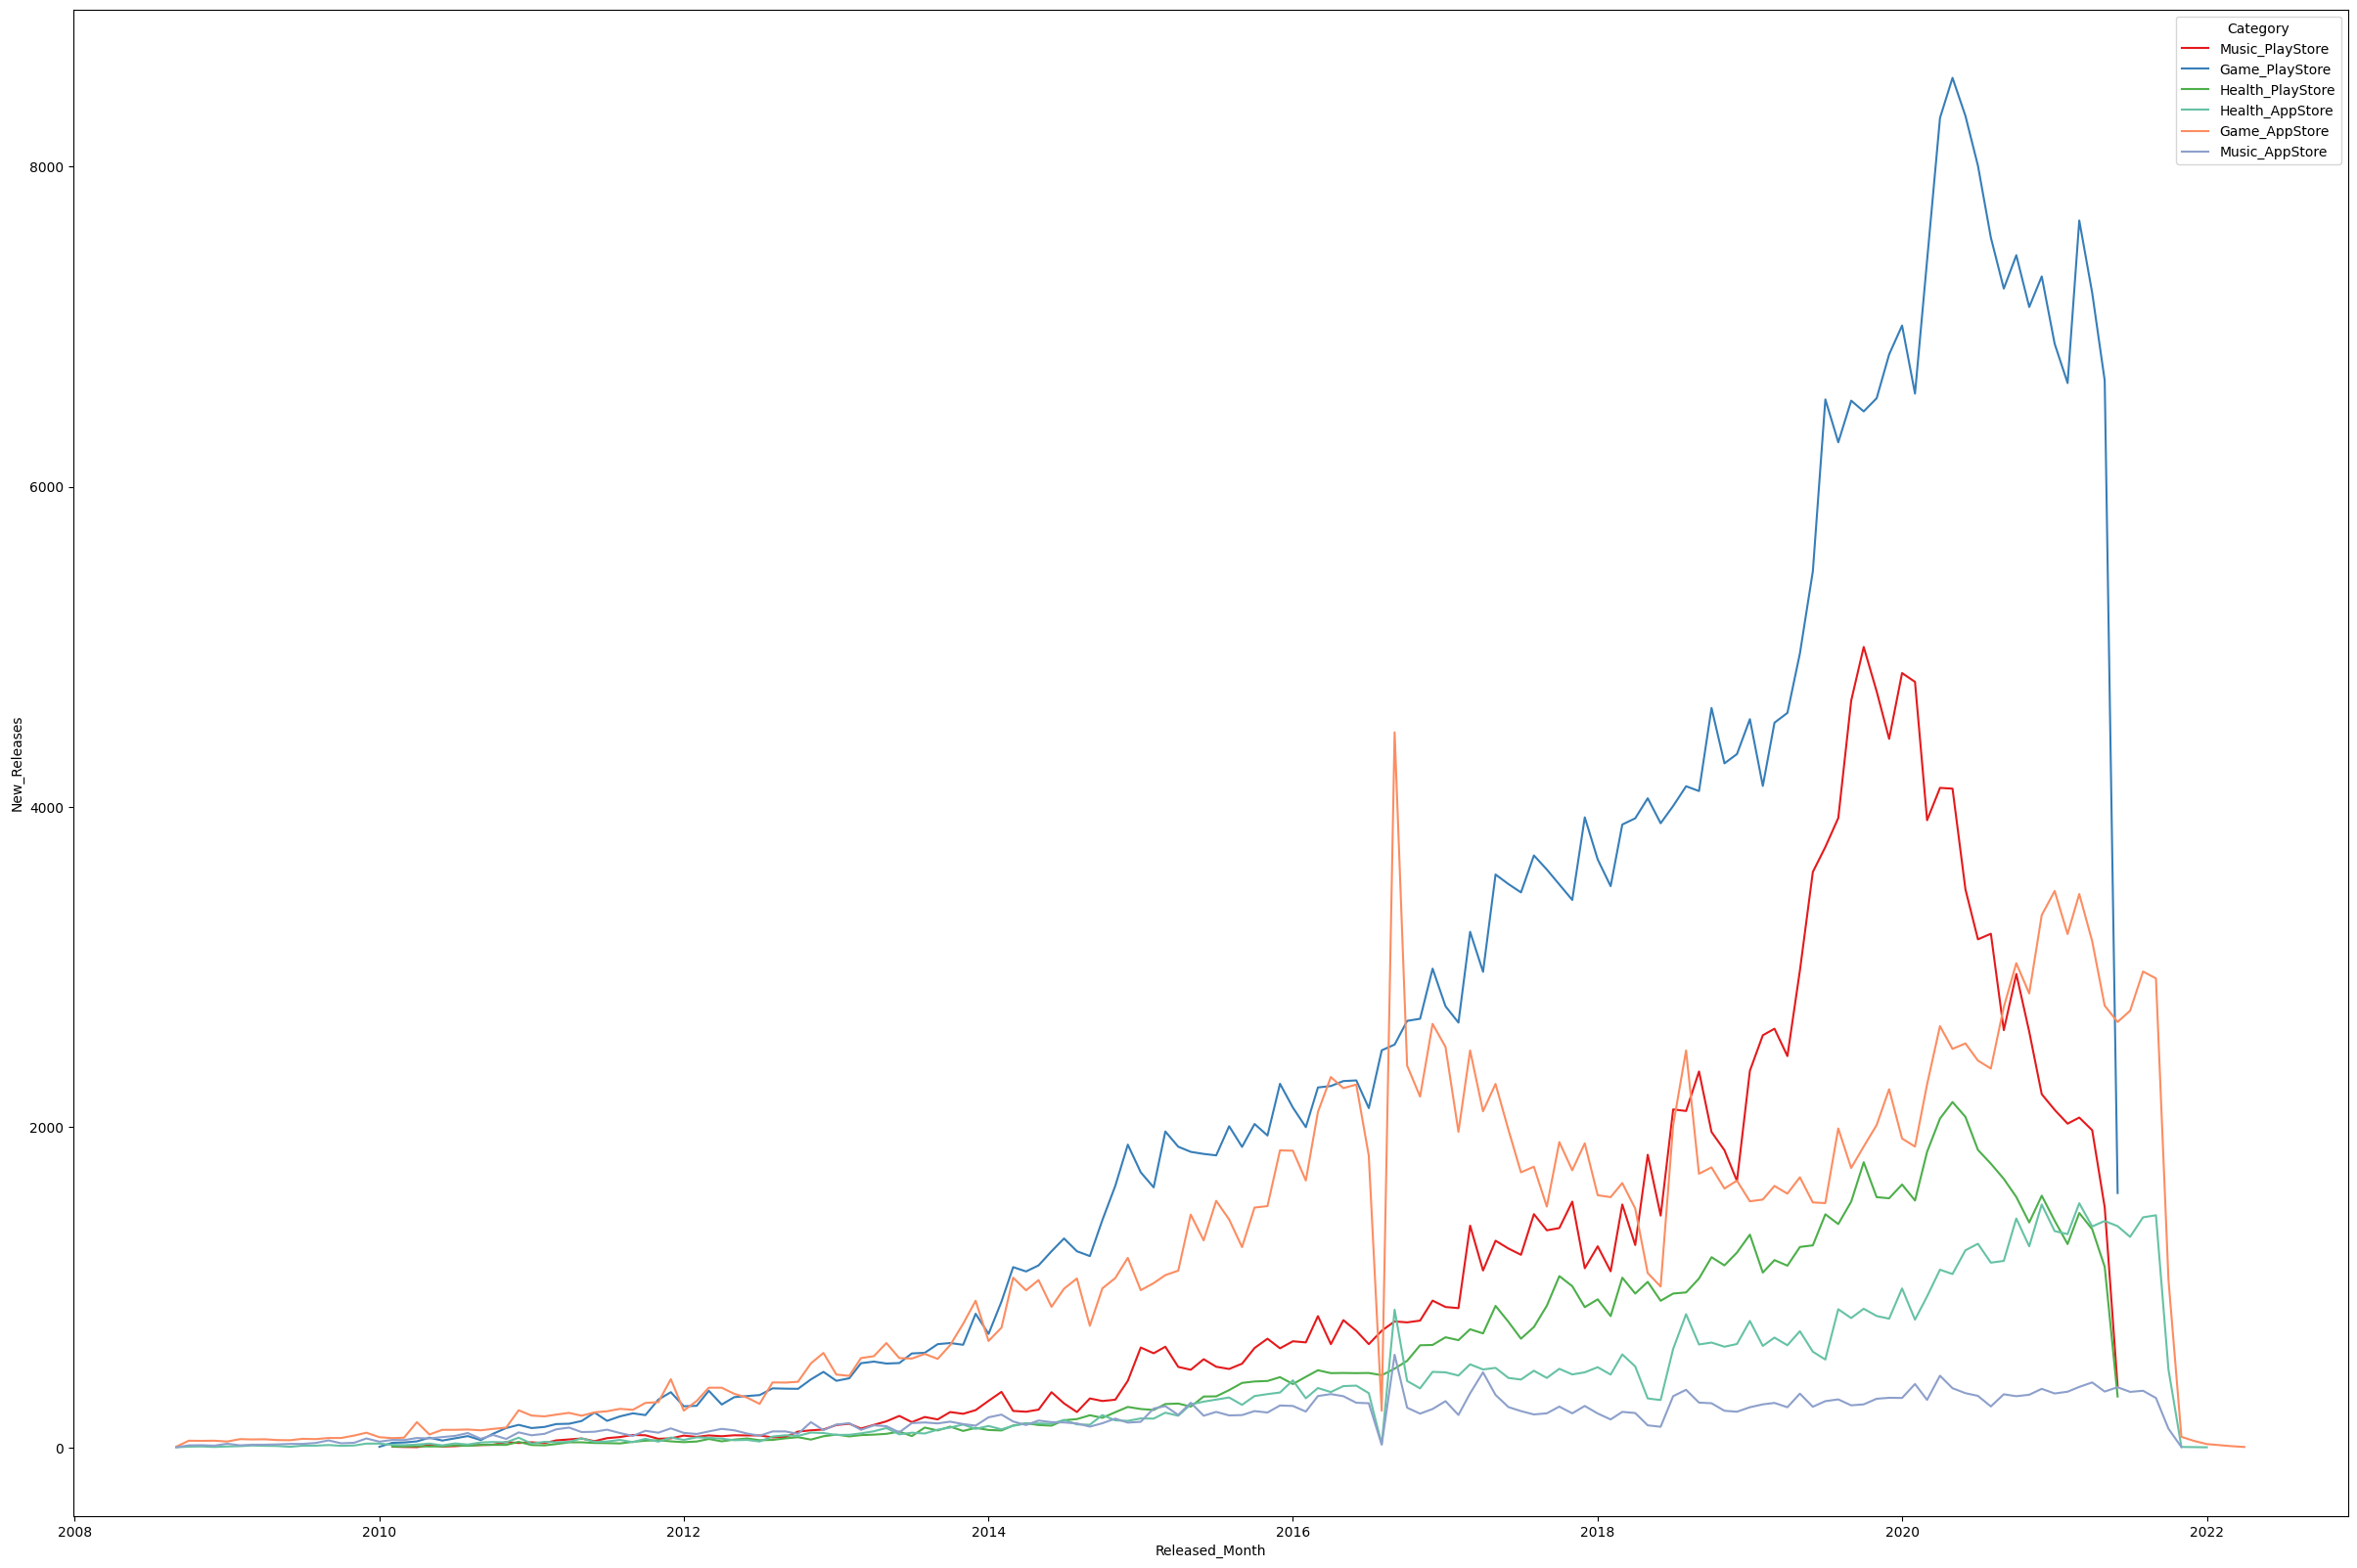

In [36]:
fig, ax = plt.subplots(figsize=(30,20))
sns.lineplot(x='Released_Month', y='New_Releases', hue='Category', data=google_new_releases_MoM, ax=ax, palette='Set1')
sns.lineplot(x='Released_Month', y='New_Releases', hue='Category', data=apple_new_releases_MoM, ax=ax, palette='Set2')



### New Releases each year by category
- In Year-2020 we can see ever growing number of new Apps
- Number of new apps released in Games category has outnumberred other categories overtime
- We can also see an increase in Health category apps around 2020/2021 which might be connected with the pandemic.

# Task 4: List 10 biggest apps by size in each category by year

- Assuming that we don't need to calculate biggest accross both PlayStore & AppStore
- Below query will generate top 10 by Year, Category for each Platform i.e. PlayStore & AppStore

In [37]:
query = """
    with apple_apps_ranking as (
        select
            year(Released) as Released_Year,
            Category,
            App_Name,
            'AppStore' as Source,
            row_number() over (partition by Released_Year, Category order by Size_MB desc) as rn
        from apple_df
    ),
    
    google_apps_ranking as (
        select
            year(Released) as Released_Year,
            Category,
            "App Name" as App_Name,
            'PlayStore' as Source,
            row_number() over (partition by Released_Year, Category order by Size_MB desc) as rn
        from google_df
    ),
    
    all_data as (
        select * from google_apps_ranking
        union all
        select * from apple_apps_ranking
    )
    
    select * from all_data
    where rn < 11
"""

top_10_per_category = duckdb.query(query).to_df()
top_10_per_category

,Released_Year,Category,App_Name,Source,rn
0,NaN,Music,Radio Javan,PlayStore,1
1,NaN,Music,SYNCROOM β,PlayStore,2
2,NaN,Music,Nostalgie - What A Feeling,PlayStore,3
3,NaN,Music,KARASTA - カラオケライブ配信/歌ってみた動画アプリ,PlayStore,4
4,NaN,Music,Cebuano Christian Songs with Lyrics,PlayStore,5
...,...,...,...,...,...
819,2021.0,Game,Pascal's Wager: DE,AppStore,6
820,2021.0,Game,Base One,AppStore,7
821,2021.0,Game,Riddle of the Sphinx™ HD,AppStore,8
822,2021.0,Game,MHA: The Strongest Hero,AppStore,9
